# Intermediate Deep Learning with Pytorch

## Training Robust NN

# Dataset

In [ ]:
from torch.utils.data import Dataset
import pandas as pd

In [ ]:
class WaterDataset(Dataset):
    def __init__(self,csv_path):
        super().__init__()
        df = pd.read_csv(csv_path)
        self.data = df.to_numpy()

    def __len__(self):
        return self.data.shape[0]

    def __getItem__(self,idx):
        features = self.data[idx,:-1]
        label = self.data[idx,-1]
        return features, label
    

In [ ]:
dataset_train = WaterDataset("water_train.csv")


In [ ]:
from torch.utils.data import DataLoader

dataloader_train = DataLoader(
    dataset_train,batch_size =2,shuffle=True
)

In [ ]:
features,labels = next(iter(dataloader_train))
print(f"features : ${features}, \nLabels : ${labels}")

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init()
        self.fc1= nn.Linear(9,16)
        self.fc2= nn.Linear(16,8)
        self.fc3= nn.Linear(8,1)
    def forward(self,x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        # x = nn.functional.relu(self.fc3(x))
        x = nn.functional.sigmoid(self.fc3(x))
        return x


net = Net()

In [ ]:
# Training loop

import torch.nn as nn
import torch.optim as optim


criterion  = nn.BCEloss()
optimizer = optim.SGD(net.paramaters(),lr=0.01)

for epoch in range(1000):
    for features, labels in dataloader_train:
        optmizer.zero_grad() # clear gradients
        outputs = net(features) # forward pass
        loss = criterion(
            outputs , label.view(=1,1)
        ) # loss computation
        loss.backward() # compute gradients
        optmizer.step() # update paramters
        


In [ ]:
from torchmetric import Accuracy

acc = Accuracy(task="binary")

net.eval()
with torch.no_grad():
    for features, labels in dataloader_test:
        outputs = net(features)
        preds = (output>=0.5).float()
        acc(preds,label.view(-1,1)) # update accuracy metric

accuracy = acc.compute()

## Good Initalization <br>
Var of input layer = variance of output layer <br>
var of gradient should be same before and after a layer<br>
this depends of activation <br>
for Relu , we can use He/Kaiming initailzation

In [ ]:
import torch.nn.init as init
init.kaiming_uniform_(layer.weight)

print(layer.weight)

In [ ]:
init.kaiming_uniform_(self.fc1.weight)
init.kaiming_uniform_(self.fc2.weight)
init.kaiming_uniform_(self.fc1.weight,nonlinearity = "sigmoid")

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init()
        self.fc1= nn.Linear(9,16)
        self.bn1 = nn.BatchNorm1d(16)
    def forward(self,x):
        x = nn.fc1(x)
        x = nn.bn1(x)
        x = nn.functional.elu(x)
        return x


net = Net()

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(9, 16)
        # Add two batch normalization layers
        self.bn1 = nn.BatchNorm1d(16)
        self.fc2 = nn.Linear(16, 8)
        self.bn2 = nn.BatchNorm1d(8)
        self.fc3 = nn.Linear(8, 1)
        
        init.kaiming_uniform_(self.fc1.weight)
        init.kaiming_uniform_(self.fc2.weight)
        init.kaiming_uniform_(self.fc3.weight, nonlinearity="sigmoid")

## Images & CNN

In [ ]:
!pip install torchvision


In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((128,128))
])

dataset_train = ImageFolder(
    "data/cloud_train",
    transform =  train_transform,
)

In [ ]:
dataloader_train = DataLoader(
    dataset_train,batch_size =2,shuffle=True
)

image, label = next(iter(datalaoder_train))
print(image.shape)
[1,3,128,128]
# 1,3 size of color channel

In [ ]:
imae = image.squeeze().permute(1,2,0)
plt.imshow(image)
plt.show()

# Augmenting
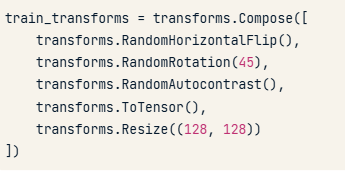

In [ ]:
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(45),
    transforms.ToTensor(),
    transforms.Resize((128,128))
])

# CNN

In [ ]:
n..Conv2d(
    3,32,kernal_szie=3,padding=1
)

In [ ]:
nn.MaxPool2d(kernal_size=2)

In [ ]:
class Net(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        # Define feature extractor
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Flatten(),
        )
        # Define classifier
        self.classifier = nn.Linear(64*16*16, num_classes)
    
    def forward(self, x):  
        # Pass input through feature extractor and classifier
        x = self.feature_extractor(x);
        x = self.classifier(x)
        return x

Binary = BCE Loss <br>
Multi class = cross entropy

In [ ]:
net= Net(7)
criterion = nn.CrossEntropyLoss()
optimizer= optim.Adam(net.parameters(),lr=0.001)

In [ ]:
for epoch in range(10):
    for images, labels in dataloader_train:
        optimzer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs,labels)
        loss.backward()
        opy=timizer.step()

# Evaluation of Classifocation across classes

In [ ]:

from torchmetrics import Recall
recall_per_class = Recall(task="multiclass", num_classes=7, average=None) 
recall_micro = Recall(task="multiclass", num_classes=7, average="micro") #imbalanced dataset
recall_macro = Recall(task="multiclass", num_classes=7, average="macro") #perfomance on small data
recall weighted Recall(task="multiclass", num_classes=7, average="weighted") # error in lg classes as more imp
=

In [ ]:
pip install torchmetrics

In [ ]:
from torchmetrics import Precision, Recall

metric_precision = Precision(
task="multiclass", num_classes=7, average="macro")

metric_recall = Recall(
task="multiclass", num_classes=7, average="macro")

net.eval()
with torch.no_grad():
    for images, labels in dataloader_test:
        outputs = net (images)
        _, preds = torch.max(outputs, 1) 
        metric_precision (preds, labels)
        metric_recall(preds, labels)
precision = metric_precision.compute() 
recall = metric_recall.compute()

In [ ]:
metric_recall = Recall(
task="multiclass", num_classes=7, average="none")

net.eval()
with torch.no_grad():
    for images, labels in dataloader_test:
        outputs = net (images)
        _, preds = torch.max(outputs, 1) 
        metric_recall(preds, labels)
        
recall = metric_recall.compute()
dataset_test.class_to_idx

In [ ]:
{
    k : recall[v].item() for k,v in dataset_test.class_to_idx,items()
}

# Handling sequences with PyTorch